<div style="border:solid Chocolate 2px; padding: 40px">

<b>Привет!👋</b>

Меня зовут Огурлиев Анзор, я буду ревьюером твоего проекта. Сразу хочу предложить тебе общаться на "ты", если тебе это неудобно, скажи мне об этом. Нам предстоит пройти с тобой через тернистый и от того интересный путь анализа данных! Можешь не переживать, я всегда помогу тебе, если у тебя возникнут вопросы)

По ходу твоей работы я буду оставлять свои комментарии, по выполненным тобой шагам. Попрошу тебя не удалять их, так мне будет проще отслеживать твой прогресс в случае повторной проверки.

Очень важно вести диалог и обсуждать те пункты, которые у тебя могли не получиться, поэтому, ты можешь оставлять свои комментарии, и мы обязательно во всем разберемся! Самое главное - выделяй свои комментарии удобным для тебя способом (цвет, рамка), но так, чтобы они отчетлитво отличались от моих комментариев. Так мы ни в чем не запутаемся)

Свои комментарии я буду выделять так: <font color='green'>зеленый</font>, <font color='gold'>желтый</font> и <font color='red'>красный</font> цвет, например:

<br/>

<div class="alert alert-success">
<h2> Комментарий ревьюера V1<a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Этот комментарий я буду оставлять, если твое решение оптимально для данного шага.
</div>

<br/>

<div class="alert alert-warning">
    <h2> Комментарий ревьюера V1<a class="tocSkip"> </h2>

<b>Некоторые замечания и рекомендации💡:</b> Это не означает, что ты совершил ошибку. Такими комментариями я буду отмечать места, где ты справился с задачей, но её можно решить ещё лучше. Также в таких комментариях я буду оставлять для тебя другие советы.
</div>


<br/>
<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера V1<a class="tocSkip"></h2>


<b>На доработку🤔:</b>
Если решение, которое ты применил на определенном шаге, требует значительных изменений, то я буду оставлять такой комментарий. Тебе нужно будет подумать еще раз как правильным образом решить данный этап. Если ревью содержит такие комментарии, то я не смогу принять проект с первого раза.
</div>

P.S. В оглавлении комментария ты увидишь `V1` (`V1`, `V2`, `V3`) - это версия моего комментария, которая понадобится нам с тобой, чтобы не запутаться, если потребуется оставить тебе комментарии после первой проверки.

# Анализ данных в интернет-магазине «Стримчик»

# Описание проекта:  
    Интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры.   
    Доступны данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation).  
    Исследование проводится в декабре 2016 г.  
    Необходимо выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.  
    Рекламная кампания планируется на 2017-й г.   
    В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию


**Описание данных**
  
  Name — название игры
  
  Platform — платформа
  
  Year_of_Release — год выпуска
  
  Genre — жанр игры
  
  NA_sales — продажи в Северной Америке (миллионы проданных копий)
  
  EU_sales — продажи в Европе (миллионы проданных копий)
  
  JP_sales — продажи в Японии (миллионы проданных копий)
  
  Other_sales — продажи в других странах (миллионы проданных копий)
  
  Critic_Score — оценка критиков (максимум 100)
  
  User_Score — оценка пользователей (максимум 10)
  
  Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

# План работы
__1 Открыть файл с данными и изучите общую информацию__

__2 Подготовка данных:__

-Импортировать исходные данные о продажах игр, оценках пользователей и экспертов, жанрах, платформах и возрастном рейтинге ESRB.  
-Очистить данные от недостающих значений или ошибок.  
-Преобразовать данные в удобный для анализа формат.

__3 Исследовательский анализ данных:__

-Изучить статистики и распределения данных.  
-Выявить основные тренды и паттерны, используя визуализации, графики и диаграммы.  
-Оценить общую динамику продаж игр, а также провести сравнительный анализ по различным переменным.

__4 Составьте портрет пользователя каждого региона:__  
-Определить для пользователя каждого региона (NA, EU, JP):  
-Самые популярные платформы (топ-5). Опишите различия в долях продаж.  
-Самые популярные жанры (топ-5). Поясните разницу.  
-Влияет ли рейтинг ESRB на продажи в отдельном регионе?

__5 Проверить гипотезы__
-Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
-Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

__6 Общий вывод__

<div class="alert alert-success">
<h2> Комментарий ревьюера V1<a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Молодец, что начинаешь проект с описания.

### Изучение общей информации

In [1]:
#Импортируем необходимые библиотеки
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st
from math import factorial, sqrt

In [2]:
#Загрузим исследуемый датасет
df = pd.read_csv('/datasets/games.csv')

#Зафиксируем начальное количество данных
start_len_df = df.shape[0]
print('Начальное количество данных:',start_len_df)

Начальное количество данных: 16715


In [3]:
#Выведем информацию по датафрейму и первые 10 строк
df.info()
display(df.head(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


Общая гистограмма для всех числовых столбцов таблицы

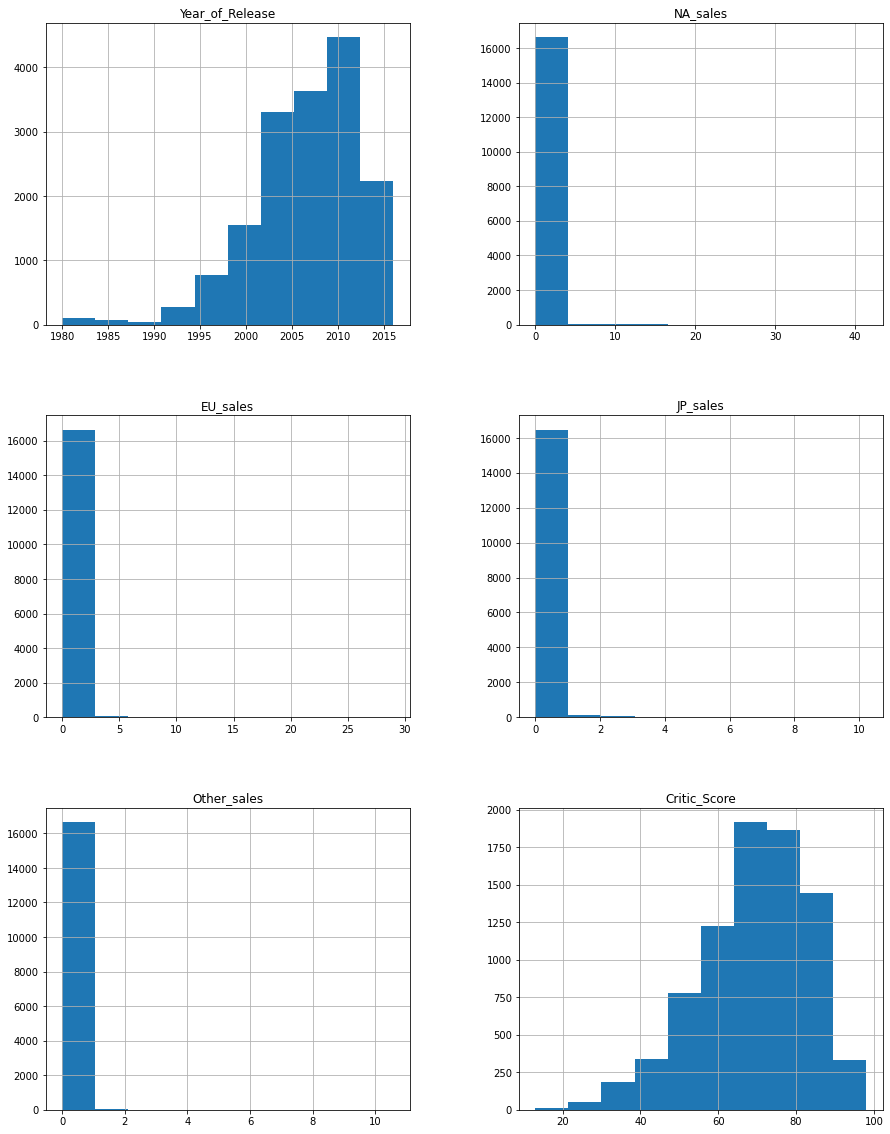

In [4]:
df.hist(figsize=(15, 20))
plt.show()

**Промежуточный вывод**  
Данная таблица состоит из 11 столбцов и 16715 записей.  
Много пропусков в столбцах Critic_Score, User_Score, Rating 

Типы переменных:

Категориальный: Name, Platform, Genre, Rating.  
Количественный: Year_of_Release, NA_sales, EU_sales, JP_sales, Other_sales, Critic_Score, User_Score.

<div class="alert alert-success">
<h2> Комментарий ревьюера V1<a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Правильно рассмотрел данные, с которыми предстоит работать.

### Подготовка данных

#### Названия столбцов

In [5]:
#Приведем названия столбцов к нижнему регистру
df.columns = df.columns.str.lower()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


<div class="alert alert-success">
<h2> Комментарий ревьюера V1<a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Правильно привел названия столбцов к нижнему регистру.

#### Преобразование типов данных

In [6]:
#Преобразуем year_of_release к целочисленному формату
display(df['year_of_release'].isna().value_counts())
display(df['critic_score'].isna().value_counts())

False    16446
True       269
Name: year_of_release, dtype: int64

True     8578
False    8137
Name: critic_score, dtype: int64

Так как в year_of_release содержится год и он не может быть дробным, его следует привести к целомучисленному типу.  
В critic_score содержатся только целые значения, имеет смысл перевести столбец к целочисленному типу.

In [7]:
#Так как в year_of_release, critic_score имеются пропуски, приведем к типу Int64
df = df.astype({"year_of_release": "Int64", "critic_score": "Int64"})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   Int64  
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: Int64(2), float64(4), object(5)
memory usage: 1.4+ MB


TBD "to be defined" - это отсутсвие оценки на момент выгрузки датафрейма.  
Строковое значение "tbd" означает, что сейчас идет оценивание и по факту оценки нет, поэтому все "tbd" можно заменить на NaN.

In [8]:
df['user_score'] = pd.to_numeric(df['user_score'], downcast='float', errors ='coerce')
df['user_score'] = df['user_score'].round(1)

<div class="alert alert-success">
<h2> Комментарий ревьюера V1<a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> В данном случае можно заменить значения tbd на nan.

#### Обработка пропусков

In [9]:
#Определим пропущенные значения в названиях игр
display(df[df['name'].isna() == True])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,<NA>,NaN,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,<NA>,NaN,NaN


In [10]:
#Так как восстановить названия игр не представляется возможным, удалим эти две записи 
df = df[~(df['name'].isna() == True)]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   Int64  
 9   user_score       7590 non-null   float32
 10  rating           9949 non-null   object 
dtypes: Int64(2), float32(1), float64(4), object(4)
memory usage: 1.5+ MB


<div class="alert alert-success">
<h2> Комментарий ревьюера V1<a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Можно удалить эти игры, их всего 2.

Заполним часть пропусков в year_of_release значением из названия name. Так как год релиза игр идет перед началом спортивного сезона, заполним значениями на год раньше. 

In [11]:
dfr = df[['name','year_of_release']]
def fill_year(row):
        split_name = row.split()
        year_name = 0
        for year in split_name:
            if year.isnumeric():
                year_name = int(year)   
        return year_name-1
dfr['year_of_release_n']= df['name'].apply(fill_year)
dfr = dfr[(dfr['year_of_release'].isna() == True) & (dfr['year_of_release_n'] < 2017) & (dfr['year_of_release_n'] > 1980)]
dfr['year_of_release'] = dfr['year_of_release_n']
dfr = dfr[['name','year_of_release']]
df = df.astype({"year_of_release": "Int64"})

/tmp/ipykernel_67/3152164215.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfr['year_of_release_n']= df['name'].apply(fill_year)


In [12]:
display(dfr)

,name,year_of_release
183,Madden NFL 2004,2003
377,FIFA Soccer 2004,2003
475,wwe Smackdown vs. Raw 2006,2005
1650,NASCAR Thunder 2003,2002
3486,Madden NFL 2002,2001
4775,NFL GameDay 2003,2002
5156,NBA Live 2003,2002
5655,All-Star Baseball 2005,2004
5889,NBA Live 2003,2002
8918,All-Star Baseball 2005,2004


In [13]:
df['year_of_release'].fillna(dfr['year_of_release'], inplace=True)

In [14]:
df['year_of_release'].isna().value_counts()

False    16459
True       254
Name: year_of_release, dtype: int64

Остальные пропуски в year_of_release восстановить невозможно, удалим их

In [15]:
df.drop(df[df['year_of_release'].isna()].index,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16459 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16459 non-null  object 
 1   platform         16459 non-null  object 
 2   year_of_release  16459 non-null  Int64  
 3   genre            16459 non-null  object 
 4   na_sales         16459 non-null  float64
 5   eu_sales         16459 non-null  float64
 6   jp_sales         16459 non-null  float64
 7   other_sales      16459 non-null  float64
 8   critic_score     7994 non-null   Int64  
 9   user_score       7472 non-null   float32
 10  rating           9778 non-null   object 
dtypes: Int64(2), float32(1), float64(4), object(4)
memory usage: 1.5+ MB


Так как значения в critic_score,user_score,rating не зависимы от других столбцов, объективное заполнение пропусков не представляется возможным.
Причинами пропусков в данных могут быть как человеческий фактор так и системные ошибки. Оценка игр походит не быстро, а может даже вообще не пройти, так что по всему миру крупные агенства по рейтингу игр могут не оставить оценку. Из-за этого в большинстве случаев отсутсвуют оценки игроков или ESRB оценка.

<div class="alert alert-success">
<h2> Комментарий ревьюера V1<a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Абсолютно верно обработал пропуски, продолжай в том же духе!

#### Удаление дубликатов

In [16]:
df.drop_duplicates()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16459 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16459 non-null  object 
 1   platform         16459 non-null  object 
 2   year_of_release  16459 non-null  Int64  
 3   genre            16459 non-null  object 
 4   na_sales         16459 non-null  float64
 5   eu_sales         16459 non-null  float64
 6   jp_sales         16459 non-null  float64
 7   other_sales      16459 non-null  float64
 8   critic_score     7994 non-null   Int64  
 9   user_score       7472 non-null   float32
 10  rating           9778 non-null   object 
dtypes: Int64(2), float32(1), float64(4), object(4)
memory usage: 1.5+ MB


Явных дубликатов не обнаружено.

In [17]:
#Поиск дубликатов в столбцах name,platform,year_of_release
#duplicates_df = df.loc[:, 'name':'genre']
#duplicates_df.drop_duplicates()
#duplicates_df.info()


<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера V1<a class="tocSkip"></h2>


<b>На доработку🤔:</b>
Нужно проверить данные на наличие неявных дубликатов. Это игры с одинаковым названием, годом релиза, жанром и платформой, а в других столбцах значения могут отличаться. Можно воспользоваться методом duplicated().

<div class="alert-info" style="padding: 20px; border-radius: 10px">
Проверим наличие неявных дубликатов
</div>

In [18]:
display(df[df.duplicated(subset=['name','platform','year_of_release','genre'], keep=False) == True])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
604,Madden NFL 13,PS3,2012,Sports,2.11,0.22,0.0,0.23,83,5.5,E
16230,Madden NFL 13,PS3,2012,Sports,0.00,0.01,0.0,0.00,83,5.5,E


Обнаружен один дубликат. Удалим запись с индексом 16230, так как в нем меньше данных по продажам

In [19]:
df = df.drop(index=[16230])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16458 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16458 non-null  object 
 1   platform         16458 non-null  object 
 2   year_of_release  16458 non-null  Int64  
 3   genre            16458 non-null  object 
 4   na_sales         16458 non-null  float64
 5   eu_sales         16458 non-null  float64
 6   jp_sales         16458 non-null  float64
 7   other_sales      16458 non-null  float64
 8   critic_score     7993 non-null   Int64  
 9   user_score       7471 non-null   float32
 10  rating           9777 non-null   object 
dtypes: Int64(2), float32(1), float64(4), object(4)
memory usage: 1.5+ MB


<div class="alert alert-success">
<h2> Комментарий ревьюера V2<a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Все верно

#### Подсчет суммарных продаж по всему миру

In [20]:
df['global_sales'] = (df['na_sales'] + df['eu_sales'] 
                                   + df['jp_sales'] + df['other_sales'])
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,global_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,<NA>,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,<NA>,NaN,NaN,31.38


<div class="alert alert-success">
<h2> Комментарий ревьюера V1<a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Суммарные продажи посчитаны верно.

На этапе подготовки данных была произведена работа по:  
- Приведению названия столбцов в стандартный для Python вид  
- Изменению типов данных в столбцах year_of_release и critic_score  
- Заполнению пропущенных значений(15 записей) в year_of_release из названия игр. Остальные пропущенные записи (254 шт) были исключены из выборки.  
- Поиску дубликатов. Дубликаты в датафрейме не найдены.  
- Добавлению столбеца global_sales с просуммированными продажами во всех регионах.

### Исследовательский анализ данных

#### Вывод количества игр за разные годы

2008    1427
2009    1426
2010    1256
2007    1199
2011    1136
Name: year_of_release, dtype: Int64

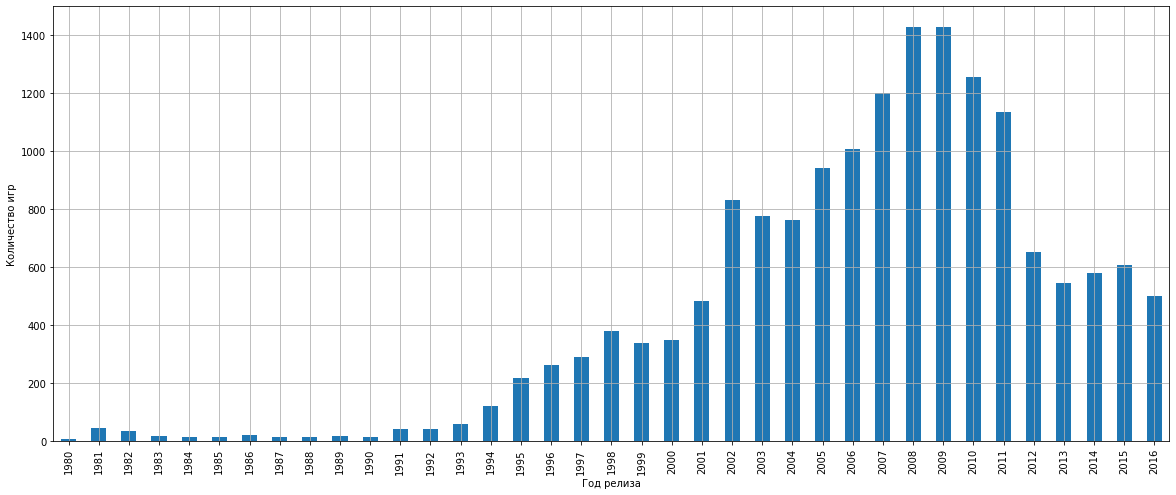

In [21]:
plt.rcParams ['figure.figsize'] = [20, 8]
df.pivot_table(index='year_of_release', values='name', aggfunc=['count']).plot(kind='bar',grid=True, legend = False)
plt.ylabel('Количество игр')
plt.xlabel('Год релиза')
pd.options.mode.chained_assignment = None
df['year_of_release'].value_counts().head()

<AxesSubplot:>

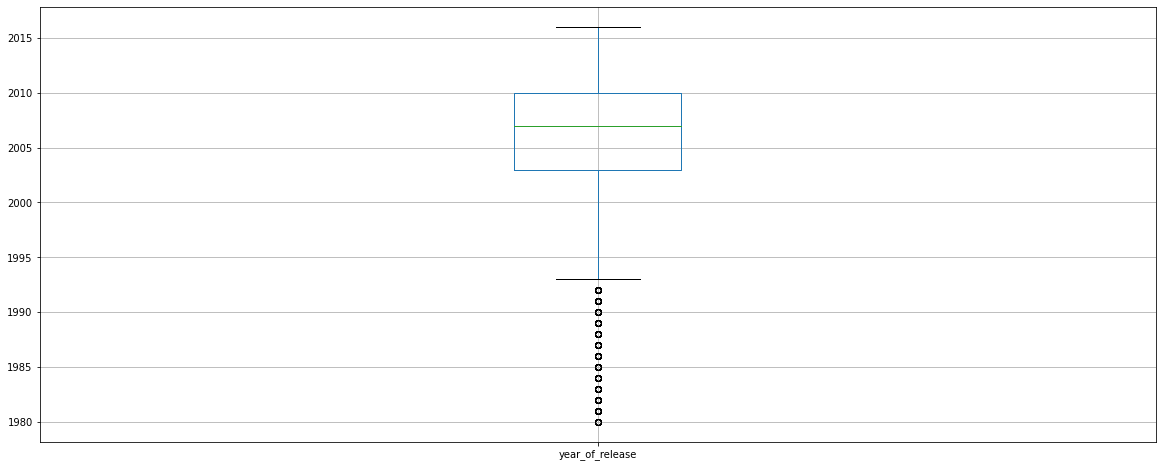

In [22]:
df.boxplot(column='year_of_release')

Исходя из построенных диаграмм, можно сделать вывод что нужный нам диапазон с датой релиза 1993-2016гг.Пик выпуска игр приходится на 2008,2009гг. Резкий спад выпуска игр 2012году возможно обусловлен экономическим кризисом

<div class="alert alert-success">
<h2> Комментарий ревьюера V1<a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Все так, согласен с тобой.

#### Продажи по платформам.

In [23]:
platform_sales = pd.pivot_table(df, index=['platform'], values = 'global_sales', aggfunc='sum')
platform_sales = platform_sales.sort_values('global_sales',ascending=False)
platform_sales

,global_sales
platform,
PS2,1247.28
X360,961.30
PS3,931.33
Wii,891.18
DS,802.79
PS,727.58
PS4,314.14
GBA,312.88
PSP,289.54


In [24]:
#Рассмотрим первые 5 платформ
top_platform = list(platform_sales.index[:5])
display(top_platform)
df_top_platform = df[df['platform'].isin(top_platform)]
df_top_platform.info()

['PS2', 'X360', 'PS3', 'Wii', 'DS']

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8081 entries, 0 to 16711
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             8081 non-null   object 
 1   platform         8081 non-null   object 
 2   year_of_release  8081 non-null   Int64  
 3   genre            8081 non-null   object 
 4   na_sales         8081 non-null   float64
 5   eu_sales         8081 non-null   float64
 6   jp_sales         8081 non-null   float64
 7   other_sales      8081 non-null   float64
 8   critic_score     4254 non-null   Int64  
 9   user_score       4090 non-null   float32
 10  rating           5657 non-null   object 
 11  global_sales     8081 non-null   float64
dtypes: Int64(2), float32(1), float64(5), object(4)
memory usage: 804.9+ KB


<AxesSubplot:xlabel='year_of_release'>

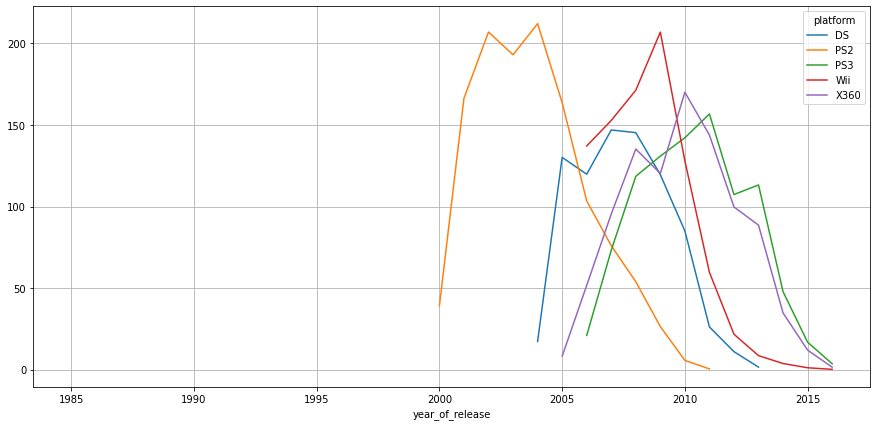

In [25]:
df_top_platform.pivot_table(index='year_of_release', columns = 'platform', values = 'global_sales', aggfunc='sum').plot(grid=True, figsize= (15, 7))


На графике видно что характерный срок 'жизни' платформы составляет 8-12 лет. Если рассматривать поколения платформы Playstation? то выход следующего поколения происходит спустя 6 лет после выхода предыдущего. 

<div class="alert alert-success">
<h2> Комментарий ревьюера V1<a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Все правильно, средний срок жизни около 10 лет.

#### Данные за актуальный период

Актуальное время для прогноза составляет 2-3 года, возьмем период с 2014 по 2016 год.

In [26]:
df_actual = df.query('year_of_release > 2013')

<div class="alert alert-success">
<h2> Комментарий ревьюера V1<a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Актуальный период подобран верно.

Прибыль платформ за актуальный период

In [27]:
df_actual_pivot = pd.pivot_table(df_actual, index=['platform','year_of_release'], 
                                     values='global_sales', aggfunc = 'sum')
df_actual_pivot

global_sales
platform year_of_release              
3DS      2014                    43.76
         2015                    27.78
         2016                    15.14
PC       2014                    13.28
         2015                     8.52
         2016                     5.25
PS3      2014                    47.76
         2015                    16.82
         2016                     3.60
PS4      2014                   100.00
         2015                   118.90
         2016                    69.25
PSP      2014                     0.24
         2015                     0.12
PSV      2014                    11.90
         2015                     6.25
         2016                     4.25
Wii      2014                     3.75
         2015                     1.14
         2016                     0.18
WiiU     2014                    22.03
         2015                    16.35
         2016                     4.60
X360     2014                    34.74
         2015                    11.96
         2016                     1.52
XOne     2014                    54.07
         2015                    60.14
         2016                    26.15

In [28]:
bestsaller_platform = pd.pivot_table(df_actual_pivot, index='platform', 
                                     values='global_sales', aggfunc = 'sum')
bestsaller_platform.sort_values('global_sales', ascending=False)

,global_sales
platform,
PS4,288.15
XOne,140.36
3DS,86.68
PS3,68.18
X360,48.22
WiiU,42.98
PC,27.05
PSV,22.40
Wii,5.07


В топ-5 прибыльных платформ входят: PS4, XOne, 3DS, PS3, X360  
Продажи PS4, XOne растут, а PS3,X360,3DS падают так как это устаревающие модели.   

<div class="alert alert-success">
<h2> Комментарий ревьюера V1<a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Все так, прежде всего стоит обратить внимание на PS4 и XOne.

#### Построим 'ящик с усами' для всех платформ за актуальный период.

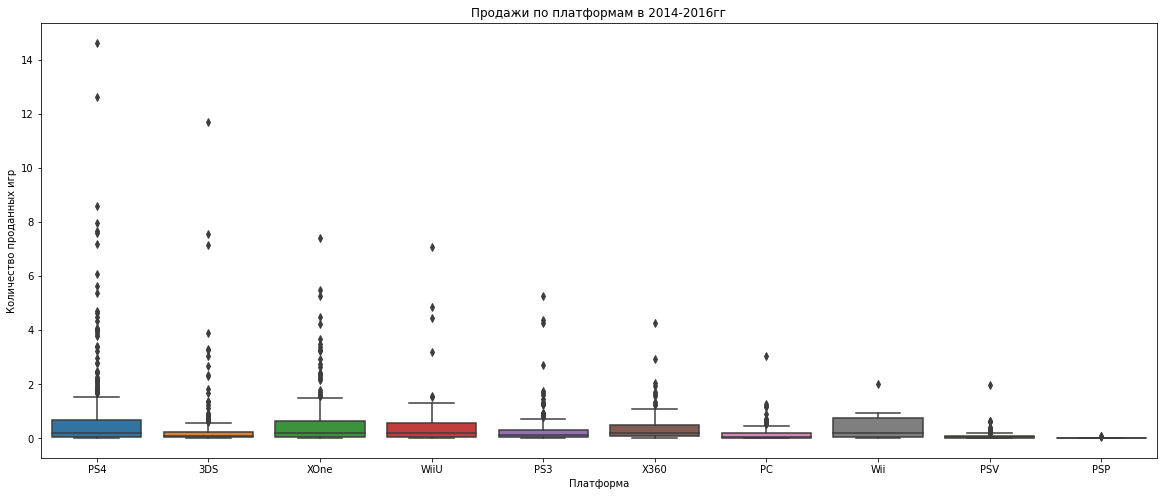

In [29]:
plt.figure(figsize=(20,8))
sns.boxplot(
    data=df_actual, 
    x='platform',
    y='global_sales'
).set(
    xlabel='Платформа',
    ylabel='Количество проданных игр',
    title='Продажи по платформам в 2014-2016гг'
)
pd.options.mode.chained_assignment = None

Разница в продажах отличается. У новых версий платформ встречаются больше популярных игр выбивающихся из средних значений.
Наиболее перспективные платформы: PS4, 3DS, XOne 

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера V1<a class="tocSkip"></h2>


<b>На доработку🤔:</b>
Нужно скорректировать график, по текущему нельзя в полной мере ответить как продажи распределены между платформами. Построй второй график с измененным масштабом по оси Y, например, с помощью метода ylim(). Оцени не только выбросы, но и статистики.

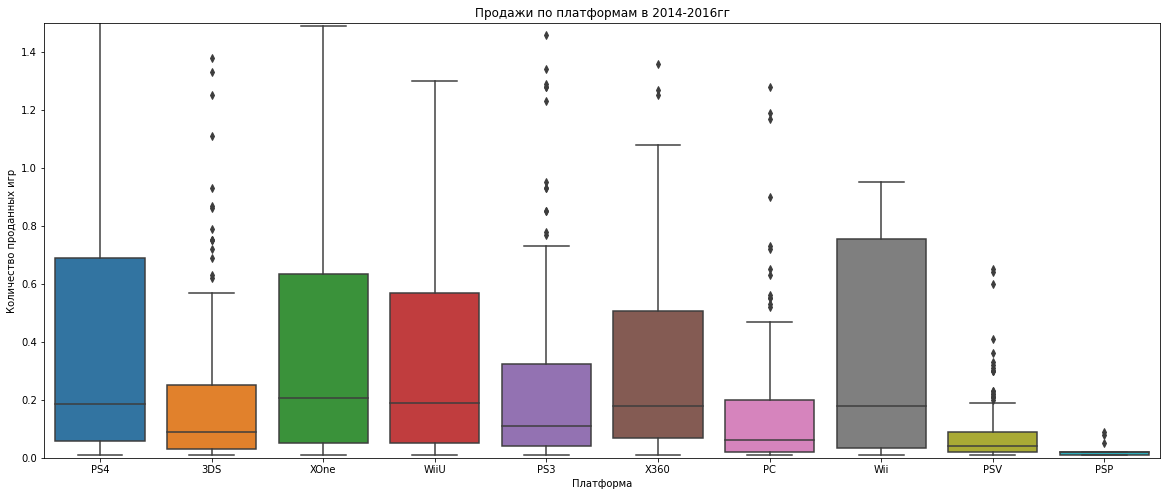

In [30]:
plt.figure(figsize=(20,8))
sns.boxplot(
    data=df_actual, 
    x='platform',
    y='global_sales',
).set(
    xlabel='Платформа',
    ylabel='Количество проданных игр',
    title='Продажи по платформам в 2014-2016гг')
plt.ylim([0, 1.5])
pd.options.mode.chained_assignment = None

In [73]:
platform_list = df_actual['platform'].unique()
for platform in platform_list:
    print('Платформа ',platform)
    display(df_actual[df_actual['platform'] == platform]['global_sales'].describe())
    print()

Платформа  PS4


count    376.000000
mean       0.766356
std        1.614969
min        0.010000
25%        0.057500
50%        0.185000
75%        0.690000
max       14.630000
Name: global_sales, dtype: float64


Платформа  3DS


count    212.000000
mean       0.408868
std        1.188368
min        0.010000
25%        0.030000
50%        0.090000
75%        0.250000
max       11.680000
Name: global_sales, dtype: float64


Платформа  XOne


count    228.000000
mean       0.615614
std        1.046513
min        0.010000
25%        0.050000
50%        0.205000
75%        0.632500
max        7.390000
Name: global_sales, dtype: float64


Платформа  WiiU


count    73.000000
mean      0.588767
std       1.161467
min       0.010000
25%       0.050000
50%       0.190000
75%       0.570000
max       7.090000
Name: global_sales, dtype: float64


Платформа  PS3


count    219.000000
mean       0.311324
std        0.633059
min        0.010000
25%        0.040000
50%        0.110000
75%        0.325000
max        5.270000
Name: global_sales, dtype: float64


Платформа  X360


count    111.000000
mean       0.434414
std        0.628967
min        0.010000
25%        0.070000
50%        0.180000
75%        0.505000
max        4.280000
Name: global_sales, dtype: float64


Платформа  PC


count    151.000000
mean       0.179139
std        0.329359
min        0.010000
25%        0.020000
50%        0.060000
75%        0.200000
max        3.050000
Name: global_sales, dtype: float64


Платформа  Wii


count    11.000000
mean      0.460909
std       0.625451
min       0.010000
25%       0.035000
50%       0.180000
75%       0.755000
max       2.010000
Name: global_sales, dtype: float64


Платформа  PSV


count    295.000000
mean       0.075932
std        0.141591
min        0.010000
25%        0.020000
50%        0.040000
75%        0.090000
max        1.960000
Name: global_sales, dtype: float64


Платформа  PSP


count    13.000000
mean      0.027692
std       0.027735
min       0.010000
25%       0.010000
50%       0.020000
75%       0.020000
max       0.090000
Name: global_sales, dtype: float64

In [64]:
display(df_actual['global_sales'].describe())

count    1689.000000
mean        0.431883
std         1.056109
min         0.010000
25%         0.030000
50%         0.100000
75%         0.350000
max        14.630000
Name: global_sales, dtype: float64

<div class="alert-info" style="padding: 20px; border-radius: 10px">

Период 2014-2016 год

Средняя выручка на игру по миру: 432 тыс. дол. 3/4 игр заработали до 350 тыс. Рекорд 14,6 млн.  
    Средняя выручка на игру по платформе PS4: 766 тыс. 3/4 игр заработали до 690 тыс. Рекорд 14,6 млн.  
    Средняя выручка на игру по платформе PS3: 311 тыс. 3/4 игр заработали до 325 тыс. Рекорд 5.27 млн.  
    Средняя выручка на игру по платформе XOne: 615 тыс. 3/4 игр заработали до 632 тыс. Рекорд 7,4 млн.  
    Средняя выручка на игру по платформе X360: 434 тыс. 3/4 игр заработали до 505 тыс. Рекорд 4,3 млн.  
    Средняя выручка на игру по платформе 3DS: 409 тыс. 3/4 игр заработали до 250 тыс. Рекорд 11,7 млн.  
    Для PS4 и 3DS видна положительная тенденция к росту продаж. Средняя больше 3го квантиля, это значит на эти платформы становятся более популярными.
    </div>

<div class="alert alert-success">
<h2> Комментарий ревьюера V2<a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Все правильно доработал, продолжай в том же духе!

#### Влияние отзывов на продажи игр популярных платформ  

**PS4**

,global_sales,critic_score,user_score
global_sales,1.000000,0.402661,-0.040132
critic_score,0.402661,1.000000,0.546434
user_score,-0.040132,0.546434,1.000000


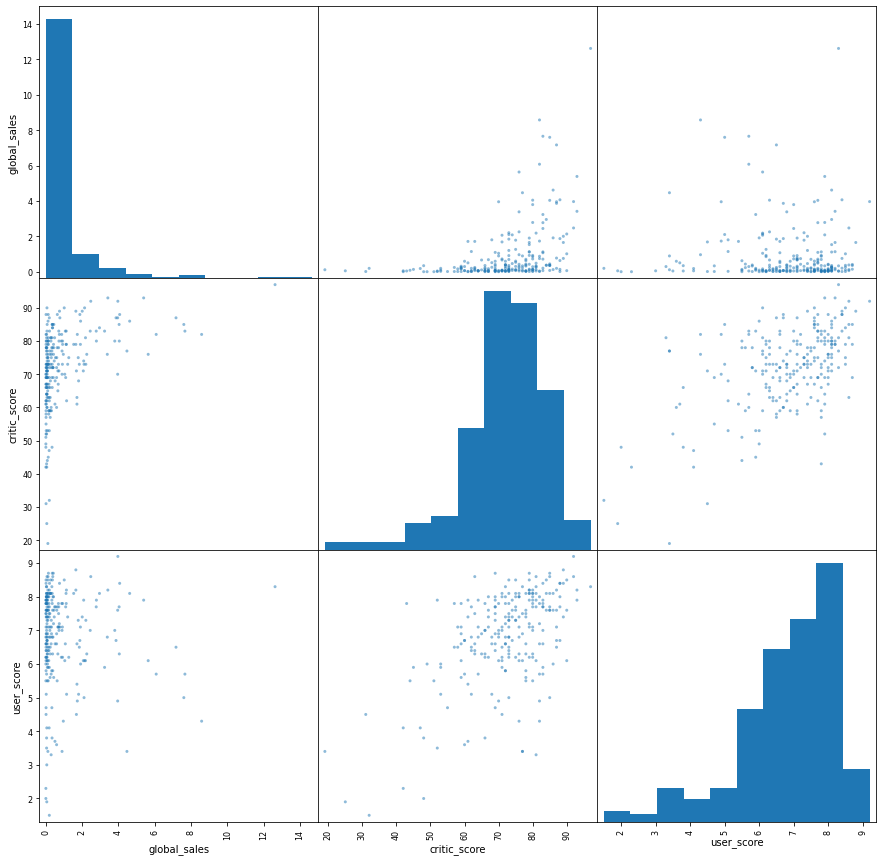

In [34]:
PS4_sales_score = df_actual.query('platform =="PS4"').loc[:,['global_sales', 'critic_score', 'user_score']]
display(PS4_sales_score.corr())
pd.plotting.scatter_matrix(PS4_sales_score, figsize=(15, 15))
pd.options.mode.chained_assignment = None

**3DS**

,global_sales,critic_score,user_score
global_sales,1.000000,0.314117,0.215193
critic_score,0.314117,1.000000,0.862485
user_score,0.215193,0.862485,1.000000


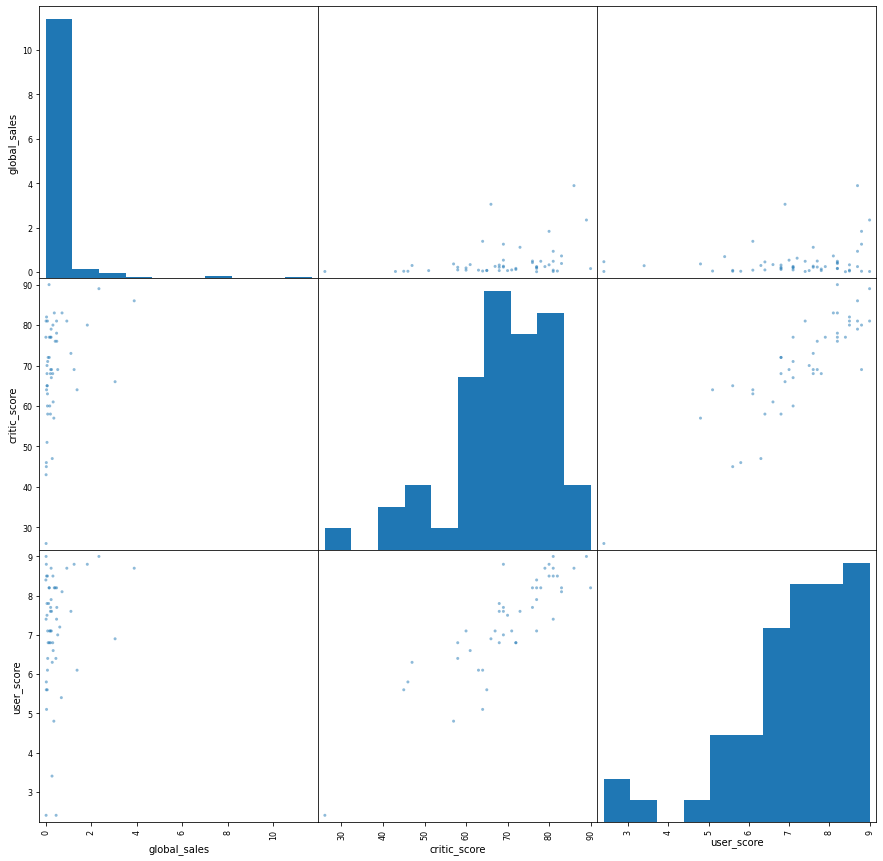

In [35]:
treeds_sales_score = df_actual.query('platform =="3DS"').loc[:,['global_sales', 'critic_score', 'user_score']]
display(treeds_sales_score.corr())
pd.plotting.scatter_matrix(treeds_sales_score, figsize=(15, 15))
pd.options.mode.chained_assignment = None

**XOne**

,global_sales,critic_score,user_score
global_sales,1.000000,0.428677,-0.070384
critic_score,0.428677,1.000000,0.440977
user_score,-0.070384,0.440977,1.000000


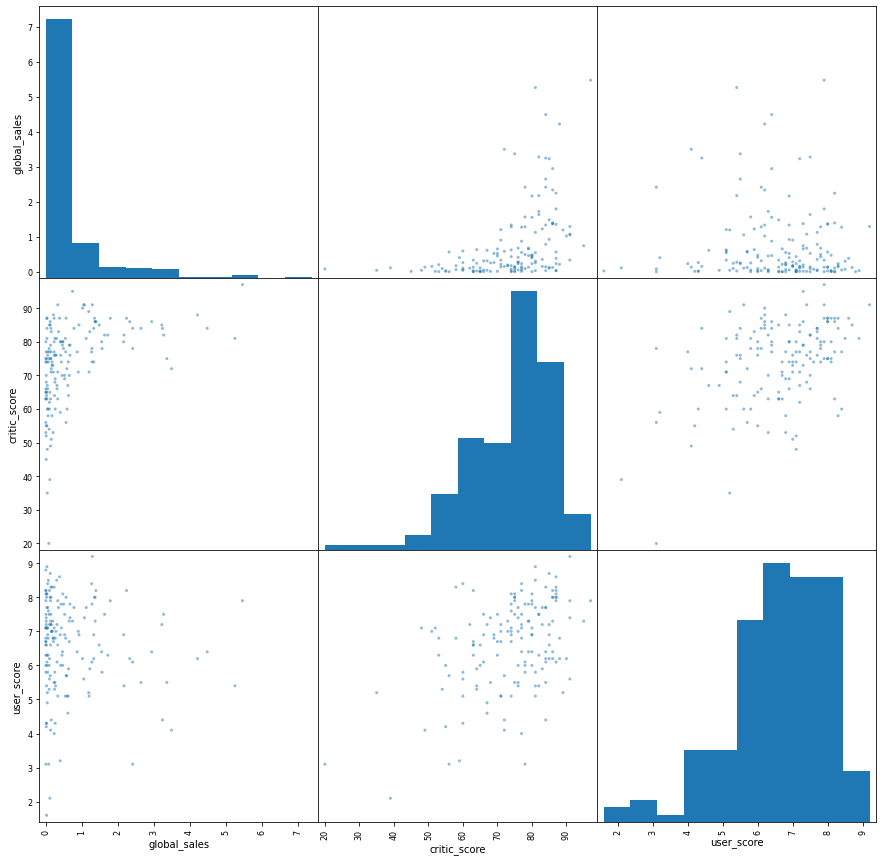

In [36]:
XOne_sales_score = df_actual.query('platform =="XOne"').loc[:,['global_sales', 'critic_score', 'user_score']]
display(XOne_sales_score.corr())
pd.plotting.scatter_matrix(XOne_sales_score, figsize=(15, 15))
pd.options.mode.chained_assignment = None

PS4 и XOne имеют схожие зависимости в отличае от 3DS, на этой платформе прямая зависимость продаж от отзыва пользователей.

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера V1<a class="tocSkip"></h2>


<b>На доработку🤔:</b>
Нужно описать детально какая зависимость между оценками и продажами. По текущему выводу не понятно какая зависимость от оценок критиков. А от пользовательских оценок?

<div class="alert-info" style="padding: 20px; border-radius: 10px">

Для платформ PS4, XOne важными критерием является качество игры. Поэтому есть прямая корреляция между прибылью и рейтингом критиков. Обратная корреляция по игрокам не носит сильного смысла.

На мнение игроков влияет рейтинг критика. То есть, чем выше ценит игру критик, тем выше оценит ее игрок.
    </div>

<div class="alert alert-success">
<h2> Комментарий ревьюера V2<a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Все верно, продажи в некоторой степени влияют на продажи, а вот оценки пользователей наоборот не оказывают никакого влияния в большинстве случаев.

#### Общее распределение игр по жанрам

In [37]:
genre_pivot = pd.pivot_table(df_actual, index='genre', values='global_sales', aggfunc='sum')
genre_pivot.sort_values('global_sales', ascending=False)

,global_sales
genre,
Action,199.36
Shooter,170.94
Sports,109.48
Role-Playing,101.44
Misc,37.55
Fighting,28.22
Racing,27.52
Platform,18.09
Adventure,17.55


Самыми прибыльными можно считать игры с жанрами Action,Shooter,Sports,Role-Playing, а самыми не популярными Strategy,Puzzle

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера V1<a class="tocSkip"></h2>


<b>На доработку🤔:</b>
В данном пункте нужно также рассмотреть средние оценки или медианные. На суммарные продажи большое влияние могут оказывать продажи игр бестселлеров, из-за них общие продажи могут быть максимальными, а продажи на одну игру наоборот значительно ниже.

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера V1<a class="tocSkip"></h2>


<b>На доработку🤔:</b>
Всегда строй графики, когда это возможно, они легче поддаются анализу.

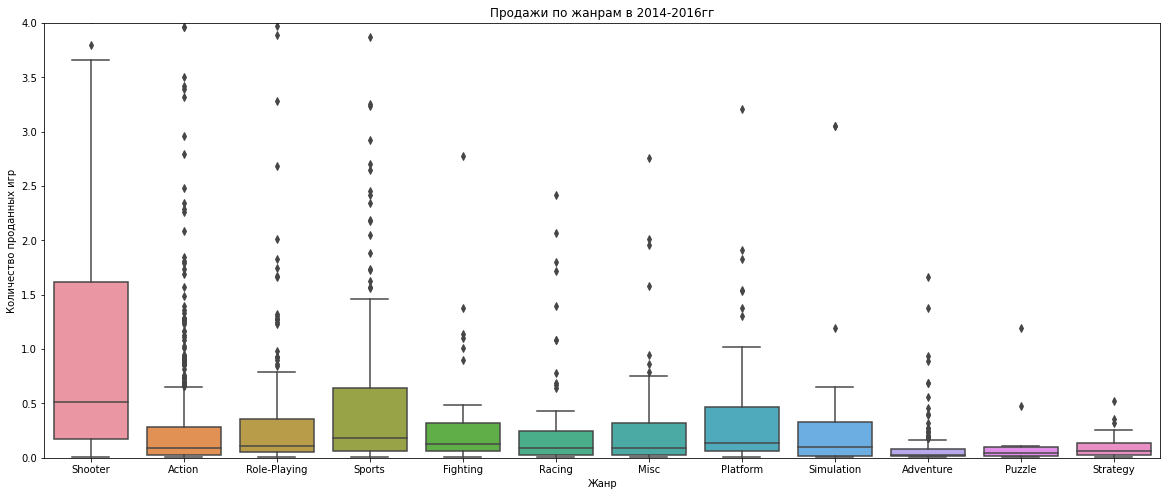

In [78]:
plt.figure(figsize=(20,8))
sns.boxplot(
    data=df_actual, 
    x='genre',
    y='global_sales',
).set(
    xlabel='Жанр',
    ylabel='Количество проданных игр',
    title='Продажи по жанрам в 2014-2016гг')
plt.ylim([0, 4])
pd.options.mode.chained_assignment = None

In [72]:
genre_list = df_actual['genre'].unique()
for genre in genre_list:
    print('Жанр ',genre)
    display(df_actual[df_actual['genre'] == genre]['global_sales'].describe())
    print()


Жанр  Shooter


count    128.000000
mean       1.335469
std        2.050567
min        0.010000
25%        0.172500
50%        0.515000
75%        1.617500
max       14.630000
Name: global_sales, dtype: float64


Жанр  Action


count    619.000000
mean       0.322068
std        0.798181
min        0.010000
25%        0.030000
50%        0.090000
75%        0.280000
max       12.620000
Name: global_sales, dtype: float64


Жанр  Role-Playing


count    221.000000
mean       0.459005
std        1.177284
min        0.010000
25%        0.050000
50%        0.110000
75%        0.360000
max       11.680000
Name: global_sales, dtype: float64


Жанр  Sports


count    161.000000
mean       0.680000
std        1.239736
min        0.010000
25%        0.060000
50%        0.180000
75%        0.640000
max        8.580000
Name: global_sales, dtype: float64


Жанр  Fighting


count    60.000000
mean      0.470333
std       1.188053
min       0.010000
25%       0.060000
50%       0.125000
75%       0.320000
max       7.550000
Name: global_sales, dtype: float64


Жанр  Racing


count    69.000000
mean      0.398841
std       0.963716
min       0.010000
25%       0.030000
50%       0.090000
75%       0.250000
max       7.090000
Name: global_sales, dtype: float64


Жанр  Misc


count    113.000000
mean       0.332301
std        0.736999
min        0.010000
25%        0.030000
50%        0.090000
75%        0.320000
max        5.270000
Name: global_sales, dtype: float64


Жанр  Platform


count    38.000000
mean      0.476053
std       0.722561
min       0.010000
25%       0.062500
50%       0.140000
75%       0.467500
max       3.210000
Name: global_sales, dtype: float64


Жанр  Simulation


count    44.000000
mean      0.298409
std       0.646925
min       0.010000
25%       0.020000
50%       0.100000
75%       0.327500
max       3.050000
Name: global_sales, dtype: float64


Жанр  Adventure


count    185.000000
mean       0.094865
std        0.203147
min        0.010000
25%        0.020000
50%        0.030000
75%        0.080000
max        1.660000
Name: global_sales, dtype: float64


Жанр  Puzzle


count    14.000000
mean      0.157857
std       0.320629
min       0.010000
25%       0.020000
50%       0.045000
75%       0.100000
max       1.190000
Name: global_sales, dtype: float64


Жанр  Strategy


count    37.000000
mean      0.107027
std       0.118412
min       0.010000
25%       0.030000
50%       0.060000
75%       0.140000
max       0.520000
Name: global_sales, dtype: float64

<div class="alert-info" style="padding: 20px; border-radius: 10px">

Период 2014-2016 год

Средняя выручка на игру по миру: 432 тыс. дол. 3/4 игр заработали до 350 тыс. Рекорд 14,6 млн.  
    Средняя выручка на игру по жанру Shooter: 1335 тыс. 3/4 игр заработали до 1617 тыс. Рекорд 14,6 млн.  
    Средняя выручка на игру по жанру Action: 322 тыс. 3/4 игр заработали до 280 тыс. Рекорд 12.62 млн.  
    Средняя выручка на игру по жанру Role-Playing: 459 тыс. 3/4 игр заработали до 360 тыс. Рекорд 11,68 млн.  
    Средняя выручка на игру по жанру Sports: 680 тыс. 3/4 игр заработали до 640 тыс. Рекорд 8,58 млн.  
    Средняя выручка на игру по жанру Fighting: 470 тыс. 3/4 игр заработали до 320 тыс. Рекорд 7,55 млн.  
    Средняя выручка на игру по жанру Racing: 398 тыс. 3/4 игр заработали до 250 тыс. Рекорд 7,09 млн.    
    Средняя выручка на игру по жанру Misc: 332 тыс. 3/4 игр заработали до 320 тыс. Рекорд 5,27 млн.  
    Средняя выручка на игру по жанру Platform: 476 тыс. 3/4 игр заработали до 467 тыс. Рекорд 3,21 млн.  
    Средняя выручка на игру по жанру Simulation: 298 тыс. 3/4 игр заработали до 327 тыс. Рекорд 3,05 млн.     
    Средняя выручка на игру по жанру Adventure: 204 тыс. 3/4 игр заработали до 80 тыс. Рекорд 1,66 млн.  
    Средняя выручка на игру по жанру Puzzle: 158 тыс. 3/4 игр заработали до 100 тыс. Рекорд 1,19 млн.  
    Средняя выручка на игру по жанру Strategy: 107 тыс. 3/4 игр заработали до 140 тыс. Рекорд 0,52 млн.  
    
Для Action,Role-Playing,Sports,Racing,Misc,Platform,Adventure,Puzzle  видна положительная тенденция к росту продаж. Средняя больше 3го квантиля, это значит на эти жанры становятся более популярными.
    </div>

<div class="alert alert-success">
<h2> Комментарий ревьюера V2<a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Абсолютно верный вывод!

**Промежуточный вывод**

В 2017 год можно ожидать подъем продаж по PS4, 3DS в жанрах Action,Role-Playing,Sports,Racing,Misc,Platform,Adventure,Puzzle

### Портрет пользователя каждого региона

Создадим выборки по регионам

**Пользователи Северной Америки**

In [38]:
df_actual_na = df_actual.query('na_sales > 0')
df_actual_na.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 981 entries, 31 to 16672
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             981 non-null    object 
 1   platform         981 non-null    object 
 2   year_of_release  981 non-null    Int64  
 3   genre            981 non-null    object 
 4   na_sales         981 non-null    float64
 5   eu_sales         981 non-null    float64
 6   jp_sales         981 non-null    float64
 7   other_sales      981 non-null    float64
 8   critic_score     571 non-null    Int64  
 9   user_score       713 non-null    float32
 10  rating           747 non-null    object 
 11  global_sales     981 non-null    float64
dtypes: Int64(2), float32(1), float64(5), object(4)
memory usage: 97.7+ KB


**Пользователи Европы**

In [39]:
df_actual_eu = df_actual.query('eu_sales > 0')
df_actual_eu.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1067 entries, 31 to 16692
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             1067 non-null   object 
 1   platform         1067 non-null   object 
 2   year_of_release  1067 non-null   Int64  
 3   genre            1067 non-null   object 
 4   na_sales         1067 non-null   float64
 5   eu_sales         1067 non-null   float64
 6   jp_sales         1067 non-null   float64
 7   other_sales      1067 non-null   float64
 8   critic_score     626 non-null    Int64  
 9   user_score       774 non-null    float32
 10  rating           803 non-null    object 
 11  global_sales     1067 non-null   float64
dtypes: Int64(2), float32(1), float64(5), object(4)
memory usage: 106.3+ KB


**Пользователи Японии**

In [40]:
df_actual_jp = df_actual.query('jp_sales > 0')
df_actual_jp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 873 entries, 31 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             873 non-null    object 
 1   platform         873 non-null    object 
 2   year_of_release  873 non-null    Int64  
 3   genre            873 non-null    object 
 4   na_sales         873 non-null    float64
 5   eu_sales         873 non-null    float64
 6   jp_sales         873 non-null    float64
 7   other_sales      873 non-null    float64
 8   critic_score     278 non-null    Int64  
 9   user_score       327 non-null    float32
 10  rating           339 non-null    object 
 11  global_sales     873 non-null    float64
dtypes: Int64(2), float32(1), float64(5), object(4)
memory usage: 87.0+ KB


Исходя из записей видно что у Европы наиболее разнообразен игровой рынок.

**Самые популярные платформы (топ-5)**

In [41]:
na_top_platform_pivot_table = pd.pivot_table(df_actual_na, index='platform', values='na_sales',
                                        aggfunc='sum').sort_values('na_sales', ascending=False)
na_top_platform_pivot_table.head()

,na_sales
platform,
PS4,98.61
XOne,81.27
X360,28.30
3DS,22.64
PS3,22.05


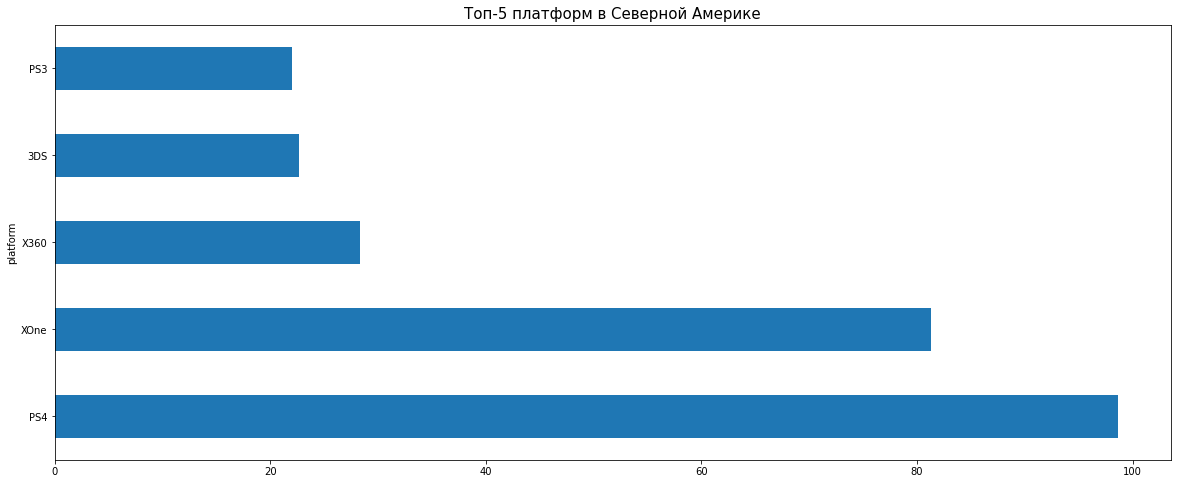

In [42]:
na_top_platform_pivot_table.head().plot(kind='barh', y = 'na_sales', legend=False)
plt.title('Топ-5 платформ в Северной Америке', fontsize= 15)
plt.show()

In [43]:
eu_top_platform_pivot_table = pd.pivot_table(df_actual_eu, index='platform', values='eu_sales',
                                        aggfunc='sum').sort_values('eu_sales', ascending=False)
eu_top_platform_pivot_table.head()

,eu_sales
platform,
PS4,130.04
XOne,46.25
PS3,25.54
PC,17.97
3DS,16.12


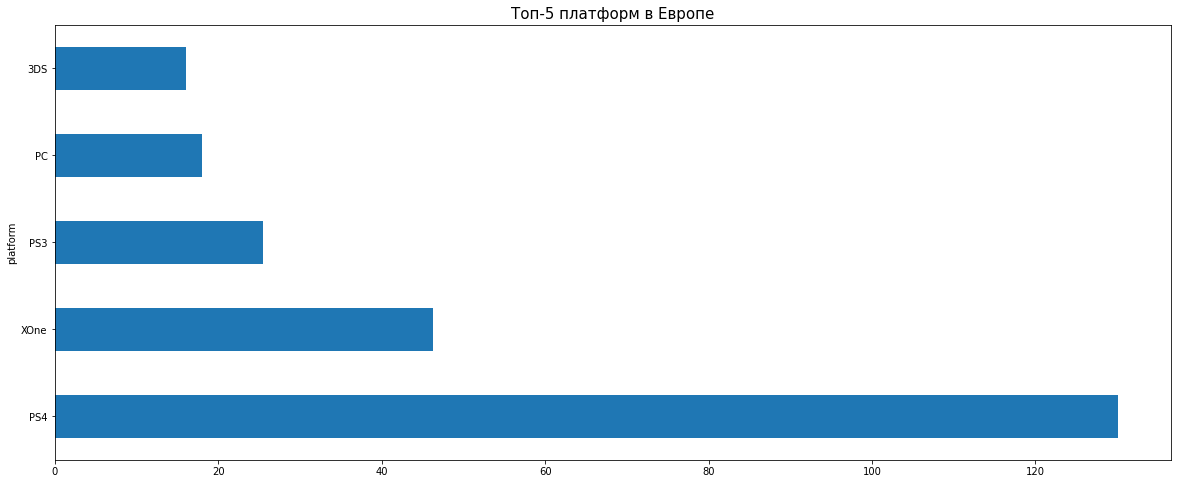

In [44]:
eu_top_platform_pivot_table.head().plot(kind='barh', y = 'eu_sales', legend=False)
plt.title('Топ-5 платформ в Европе', fontsize= 15)
plt.show()

In [45]:
jp_top_platform_pivot_table = pd.pivot_table(df_actual_jp, index='platform', values='jp_sales',
                                        aggfunc='sum').sort_values('jp_sales', ascending=False)
jp_top_platform_pivot_table.head()

,jp_sales
platform,
3DS,44.24
PS4,15.02
PSV,14.54
PS3,11.22
WiiU,7.31


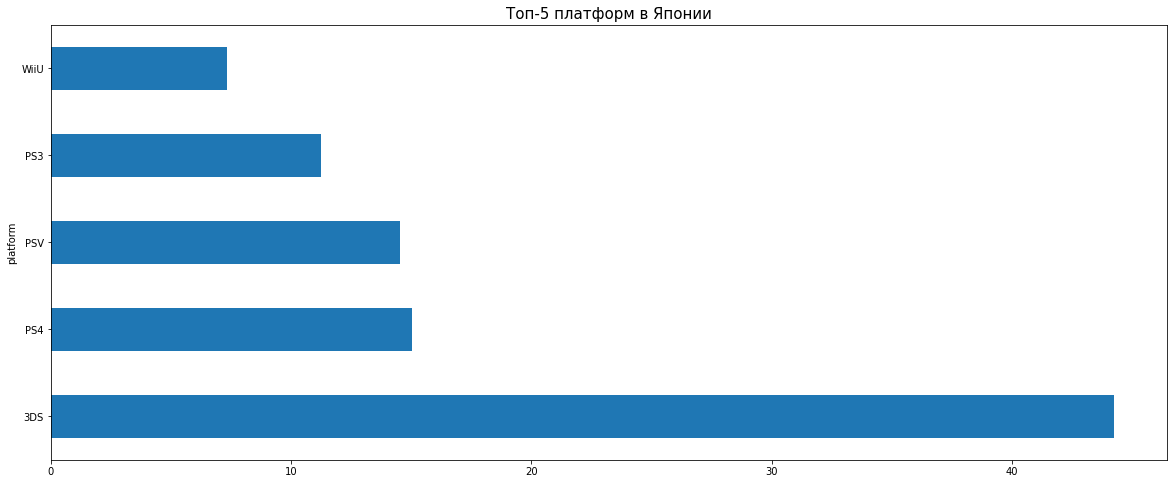

In [46]:
jp_top_platform_pivot_table.head().plot(kind='barh', y = 'jp_sales', legend=False)
plt.title('Топ-5 платформ в Японии', fontsize= 15)
plt.show()

Итого топ-5 платформ по регионам:  
    -Северная Америка: PS4,XOne,X360,3DS,PS3  
        -Европа: PS4,XOne,PS3,PC,3DS  
            -Япония:3DS,PS4,PSV,PS3,WiiU  
            В Северной Америке за первенство по продажам игр соревнуются производители платформ Sony и Microsoft,В Европе лидириует Sony, в Японии же в топе локальный бренд от компании Nintendo

**Самые популярные жанры (топ-5)**

In [83]:
na_top_genre_pivot_table = pd.pivot_table(df_actual_na, index='genre', values='na_sales',
                                        aggfunc='sum').sort_values('na_sales', ascending=False).head()
na_top_genre_pivot_table

,na_sales
genre,
Shooter,79.02
Action,72.53
Sports,46.13
Role-Playing,33.47
Misc,15.05


In [84]:
eu_top_genre_pivot_table = pd.pivot_table(df_actual_eu, index='genre', values='eu_sales',
                                        aggfunc='sum').sort_values('eu_sales', ascending=False).head()
eu_top_genre_pivot_table

,eu_sales
genre,
Action,74.68
Shooter,65.52
Sports,45.73
Role-Playing,28.17
Racing,14.13


In [85]:
jp_top_genre_pivot_table = pd.pivot_table(df_actual_jp, index='genre', values='jp_sales',
                                        aggfunc='sum').sort_values('jp_sales', ascending=False).head()
jp_top_genre_pivot_table

,jp_sales
genre,
Role-Playing,31.16
Action,29.58
Fighting,6.37
Misc,5.61
Shooter,4.87


Итого топ-5 жанров по регионам:  
    -Северная Америка: Shooter,Action,Sports,Role-Playing,Misc  
        -Европа: Action,Shooter,Sports,Role-Playing,Racing  
            -Япония:Role-Playing,Action,Fighting,Misc,Shooter   
            Для игроков из Америки и Европы характерны жанры Экшн и Шутер, а для Японии РПГ 

**Влияние рейтинга ESRB на продажи**

In [50]:
na_rating_pivot_table = pd.pivot_table(df_actual_na, index='rating', values='na_sales',
                                        aggfunc='sum').sort_values('na_sales', ascending=False)
na_rating_pivot_table

,na_sales
rating,
M,96.42
E,50.74
T,38.95
E10+,33.23


In [51]:
eu_rating_pivot_table = pd.pivot_table(df_actual_eu, index='rating', values='eu_sales',
                                        aggfunc='sum').sort_values('eu_sales', ascending=False)
eu_rating_pivot_table

,eu_sales
rating,
M,93.44
E,58.06
T,34.07
E10+,26.16


In [52]:
jp_rating_pivot_table = pd.pivot_table(df_actual_jp, index='rating', values='jp_sales',
                                        aggfunc='sum').sort_values('jp_sales', ascending=False)
jp_rating_pivot_table

,jp_sales
rating,
T,14.78
E,8.94
M,8.01
E10+,4.46


Рейтинг возраста имеет влияние на продажи в зависимости от региона.  
В Америке и Европе  популярны игры с возрастным рейтингом 'M'(Mature 17+).   
В Японии лидириуют игры с возрастным рейтингом 'T'(Teen 13+). 

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера V1<a class="tocSkip"></h2>


<b>На доработку🤔:</b>
Нужно визуализировать топовые жанры и рейтинги. Можно воспользоваться методом subplots(), чтобы построить графики в одном полотне, например, в одном ряду, так будет легче сравнивать их.

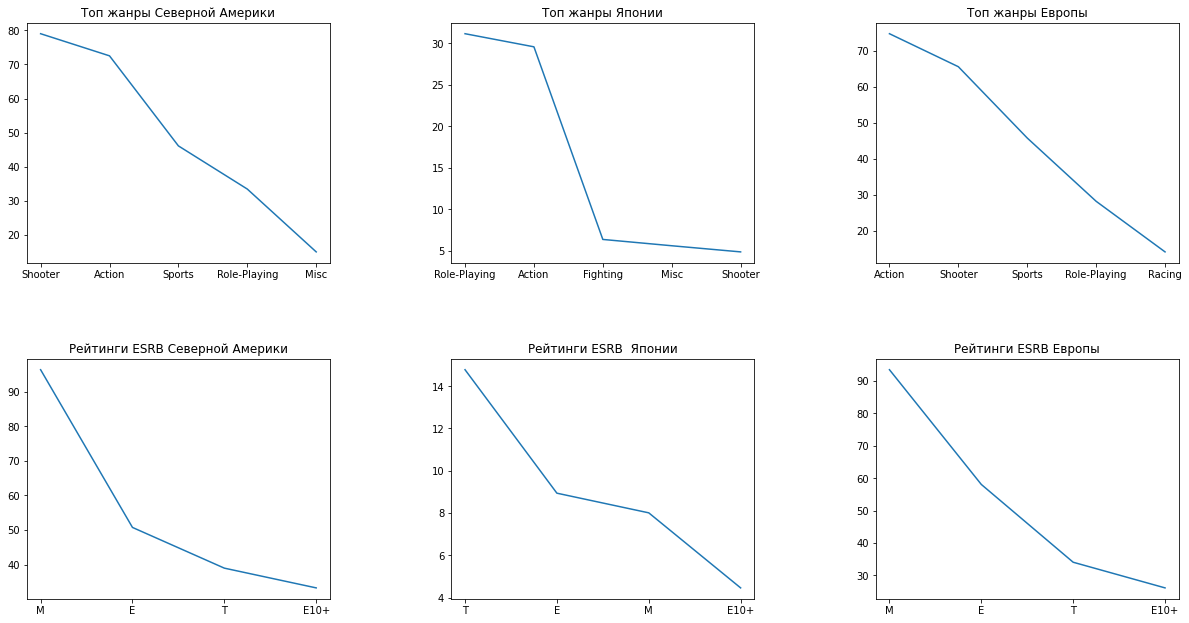

In [101]:
fig, axs = plt.subplots(2, 3, figsize=(20, 10))

axs[0, 0].plot(na_top_genre_pivot_table.index, na_top_genre_pivot_table['na_sales'])
axs[0, 0].set_title('Топ жанры Северной Америки')

axs[0, 1].plot(jp_top_genre_pivot_table.index, jp_top_genre_pivot_table['jp_sales'])
axs[0, 1].set_title('Топ жанры Японии')

axs[0, 2].plot(eu_top_genre_pivot_table.index, eu_top_genre_pivot_table['eu_sales'])
axs[0, 2].set_title('Топ жанры Европы')

axs[1, 0].plot(na_rating_pivot_table.index, na_rating_pivot_table['na_sales'])
axs[1, 0].set_title('Рейтинги ESRB Северной Америки')

axs[1, 1].plot(jp_rating_pivot_table.index, jp_rating_pivot_table['jp_sales'])
axs[1, 1].set_title('Рейтинги ESRB  Японии')

axs[1, 2].plot(eu_rating_pivot_table.index, eu_rating_pivot_table['eu_sales'])
axs[1, 2].set_title('Рейтинги ESRB Европы')

plt.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9, wspace=0.4, hspace=0.4)


plt.show()

**Основной портрет игрока в регионах**

Для Северной Америки это пользователь от 17 лет,предпочитает PS4 или XOne, любит экшны и шутеры.  
Для Европы это пользователь от 17 лет,предпочитает PS4, любит экшны и шутеры.   
Для Японии это пользователь от 13 лет,предпочитает 3DS, любит RPG. 


<div class="alert alert-success">
<h2> Комментарий ревьюера V2<a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Все правильно доработал, продолжай в том же духе!

### Проверка гипотез

**Средние пользовательские рейтинги платформ Xbox One и PC одинаковые**

In [53]:
user_rating_XOne = df_actual.query('platform == "XOne"')['user_score'].dropna()
user_rating_XOne.describe()

count    165.000000
mean       6.594544
std        1.375139
min        1.600000
25%        5.800000
50%        6.800000
75%        7.600000
max        9.200000
Name: user_score, dtype: float64

In [54]:
user_rating_PC = df_actual.query('platform == "PC"')['user_score'].dropna()
user_rating_PC.describe()

count    122.000000
mean       6.298361
std        1.703277
min        1.400000
25%        5.325000
50%        6.800000
75%        7.600000
max        9.300000
Name: user_score, dtype: float64

Нулевая гипотеза:  
"Средние пользовательские рейтинги платформ Xbox One и PC одинаковые".

Альтернативная гипотеза:  
"Средние пользовательские рейтинги платформ Xbox One и PC различаются".

Для оценки гипотезы будем применять тест Стюдента.  

При получении ответа "Отвергаем нулевую гипотезу" это будет говорить о том, что скорей всего наше предположение неверно. Значит данные различаются.

При получении ответа "Не получилось отвергнуть нулевую гипотезу", это значит что предположение о равенстве среднего рейтинга верно.

In [55]:
alpha = .01

results = st.ttest_ind(user_rating_XOne, user_rating_PC)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.10450648833224654
Не получилось отвергнуть нулевую гипотезу


Предположение о равенстве среднего рейтинга верно.

<div class="alert alert-success">
<h2> Комментарий ревьюера V1<a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Правильно сформулировал и проверил гипотезы, действительно средние оценки данных платформ с большой вероятностью равны.

**Средние пользовательские рейтинги жанров Action и Sports разные.**

In [56]:
user_rating_action = df_actual.query('genre == "Action"')['user_score'].dropna()
user_rating_action.describe()

count    297.000000
mean       6.760606
std        1.377852
min        2.000000
25%        6.100000
50%        7.100000
75%        7.700000
max        9.000000
Name: user_score, dtype: float64

In [57]:
user_rating_sports = df_actual.query('genre == "Sports"')['user_score'].dropna()
user_rating_sports.describe()

count    127.000000
mean       5.225197
std        1.856604
min        0.200000
25%        4.000000
50%        5.500000
75%        6.650000
max        8.800000
Name: user_score, dtype: float64

Нулевая гипотеза: "Средние пользовательские рейтинги жанров Action и Sports одинаковые".

Альтернативная гипотеза: "Средние пользовательские рейтинги жанров Action и Sports различаются".

Для оценки гипотезы будем применять тест Стюдента.

При получении ответа "Отвергаем нулевую гипотезу" это будет говорить о том, что скорей всего наше предположение неверно. Значит данные различаются.

При получении ответа "Не получилось отвергнуть нулевую гипотезу", это значит что предположение о равенстве среднего рейтинга верно.

In [58]:
alpha = .01

results = st.ttest_ind(user_rating_action, user_rating_sports)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 2.871146400695882e-19
Отвергаем нулевую гипотезу


Предположение о различиях пользовательских рейтингов верно.

<div class="alert alert-success">
<h2> Комментарий ревьюера V1<a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> И снова все верно.

### Общий вывод

**В итоговом анализе данных интернет-магазина "Стримчик" были выявлены следующие ключевые зависимости:**

1 Анализ продаж по годам показал, что пик выпуска игр приходится на 2008-2009 годы, а затем наблюдается спад. Это может быть связано с экономическим кризисом и изменением предпочтений потребителей. Актуальным периодом для прогноза и планирования рекламных кампаний был выбран период с 2014 по 2016 годы.

2 При анализе платформ было выявлено, что средний срок "жизни" платформы составляет примерно 8-12 лет. Наиболее перспективными платформами, которые показывают рост продаж, являются PS4, Xbox One и 3DS. Следует обратить внимание на эти платформы при планировании рекламных кампаний.

3 Жанры игр, пользующиеся наибольшей популярностью, включают Action, Shooter, Sports и Role-Playing, в то время как жанры Strategy и Puzzle менее популярны. Рекомендуется уделить особое внимание популярным жанрам при выборе игр для продвижения.

4 Портрет пользователя каждого региона отличается. В Северной Америке и Европе наиболее популярны платформы PS4 и Xbox One, а в Японии - 3DS. Жанровые предпочтения также различаются, где в Северной Америке и Европе предпочитаются экшн и шутеры, а в Японии - RPG. Возрастной рейтинг ESRB также оказывает влияние на продажи в разных регионах.

**Исходя из вышеуказанных зависимостей, можно сделать следующие рекомендации для интернет-магазина "Стримчик":**

1 Уделить особое внимание платформам PS4, Xbox One и 3DS, так как они показывают рост продаж. Планировать рекламные кампании и акции, направленные на эти платформы.

2 Выбирать для продвижения игры с популярными жанрами, такими как Action, Shooter, Sports и Role-Playing. Однако не следует полностью игнорировать игры в жанрах Strategy и Puzzle, так как они все равно имеют свою аудиторию.

3 Учитывать предпочтения и особенности игрового рынка в каждом регионе при планировании рекламных кампаний. Необходимо адаптировать контент и рекламные сообщения под предпочтения пользователей каждого региона.

4 Рассмотреть возможность анализа других факторов, таких как рейтинг критиков, наличие мультиплеерного режима, популярность определенных разработчиков и издателей игр. Эти факторы могут также оказывать значительное влияние на продажи игр.

5 Следить за новыми тенденциями в игровой индустрии, такими как развитие виртуальной реальности (VR) и увеличение популярности мобильных игр. Анализировать данные о продажах в этих сегментах и определить, есть ли потенциал для расширения ассортимента в этих направлениях.

6 Проводить регулярный мониторинг продаж и реакцию аудитории на новые игры и тренды. Это поможет оперативно реагировать на изменения в предпочтениях потребителей и адаптировать стратегию продвижения игр.


<div class="alert alert-warning">
<h2> Комментарий ревьюера V1<a class="tocSkip"> </h2>

<b>Некоторые замечания и рекомендации💡:</b> В итоговом выводе нужно достаточно подробно написать основные пункты выявленных зависимостей. Стоит доработать вывод с учетом моих комментариев по ходу работы. В итоговом выводе также старайся оставлять рекомендации для последующих шагов. Например рекомендации, что можно обработать и проанализировать другие признаки, на что твоим коллегам стоить обратить внимание.

<div class="alert alert-success">
<h2> Комментарий ревьюера V2<a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Отличный вывод, все четко, понятно и структурировано. Вывод в полной мере отражает существующие зависимости, и по нему можно принимать дальнейшие решения.
</div>

<div style="border:solid Chocolate 2px; padding: 40px">

**Общий вывод по проекту**

Спасибо за твой проект! Я уверен, что ты приложил все усилия, чтобы сделать этот проект. Это видно по твоей работе, а сформулированные выводы отражают, насколько успешно ты осваиваешь материал.

**Отмечу отдельные положительные моменты проекта🙂**:

* Ты полностью следовал всем этапам выполнения задания и справился почти со всем. Хорошая работа!
* Отдельно выделю некоторые выводы, которые ты смог сформулировать абсолютно точно!
* У тебя опрятный и читаемый код. Возможно это звучит банально, однако при работе с чужим кодом это крайне важно)


**На что стоит обратить внимание🤓**:

* Важно доработать итоговый вывод.
* Нужно еще раз посмотреть на график ящик с усами и описать его подробнее.
* Проанализируй самые популярные и непопулярные жанры.
* Остальные рекомендации ты найдешь в моих комментариях!


**Желаю удачи и жду твой проект на повторное ревью!**😉

<div style="border:solid Chocolate 2px; padding: 40px">

Ты отлично справился с данной работой! Видно, как ты успешно осваиваешь материал, применяешь полученные знания на практике. Мне было очень приятно проверять твою работу, надеюсь, мои комментарии и советы были для тебя полезными.

**Желаю удачи в последующем обучении и исследованиях!**😉